In [1]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib
import matplotlib.pyplot as plt

In [2]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩

train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

In [4]:
train_x.drop(['month','date','hour','풍향(16방위)','현상번호(국내식)'], axis=1, inplace=True)
test_x.drop(['month','date','hour','풍향(16방위)','현상번호(국내식)'], axis=1, inplace=True)

train_x.to_csv('train_x.csv', index=False)
# train_y.to_csv('train_y.csv', index=False)
test_x.to_csv('test_x.csv', index=False)
# test_y.to_csv('test_y.csv', index=False)


KeyError: "['month', 'date', 'hour', '풍향(16방위)', '현상번호(국내식)'] not found in axis"

In [3]:
train_x.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '일조(hr)', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'PM10_lag1'],
      dtype='object')

In [24]:
# columns = ['풍향(16방위)','현상번호(국내식)']
# train_x = pd.get_dummies(train_x, columns=columns, drop_first=True)
# test_x = pd.get_dummies(test_x, columns=columns, drop_first=True)

SO2


,count,mean,std,min,25%,50%,75%,max
SO2,8734.0,0.003379,0.00083,0.001,0.003,0.003,0.004,0.011


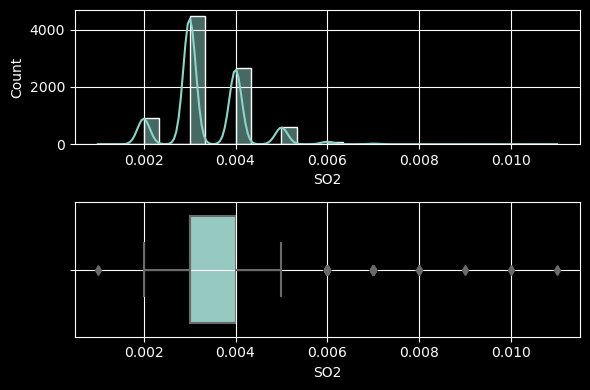

CO


,count,mean,std,min,25%,50%,75%,max
CO,8734.0,0.505129,0.209521,0.2,0.4,0.4,0.6,2.0


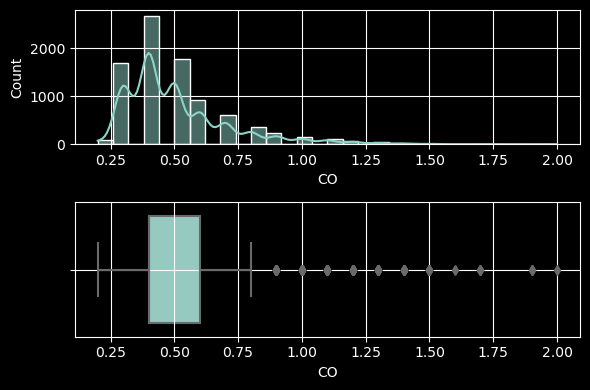

O3


,count,mean,std,min,25%,50%,75%,max
O3,8734.0,0.029316,0.019676,0.0,0.015,0.028,0.04,0.137


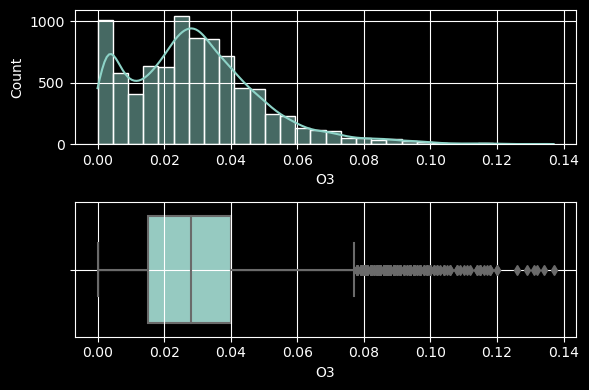

NO2


,count,mean,std,min,25%,50%,75%,max
NO2,8734.0,0.023285,0.014457,0.003,0.012,0.019,0.031,0.082


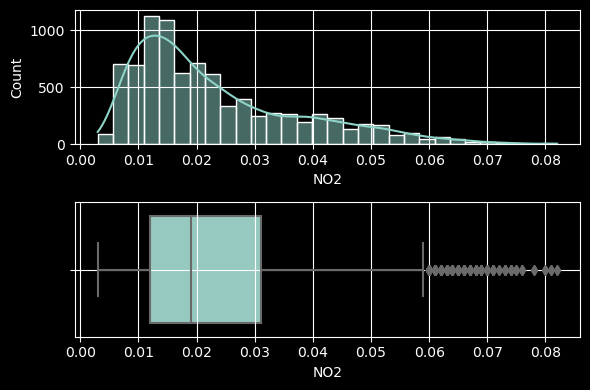

PM10


,count,mean,std,min,25%,50%,75%,max
PM10,8734.0,38.797,47.318845,3.0,18.0,30.0,46.0,942.0


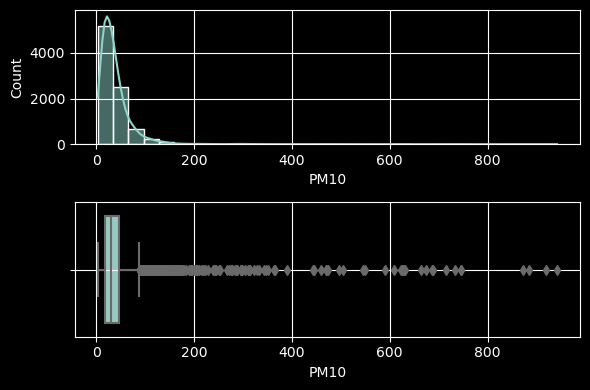

PM25


,count,mean,std,min,25%,50%,75%,max
PM25,8734.0,20.389283,16.534605,1.0,10.0,16.0,25.0,154.0


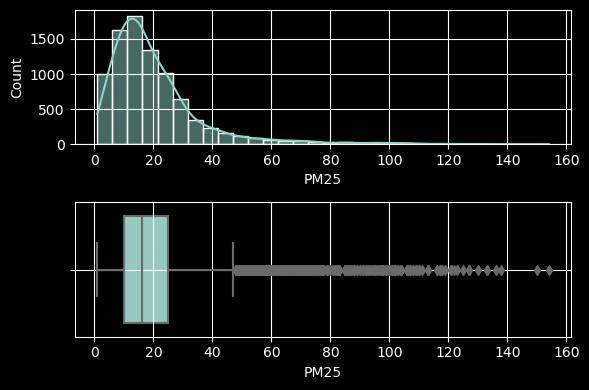

기온(°C)


,count,mean,std,min,25%,50%,75%,max
기온(°C),8734.0,13.717861,10.901469,-18.5,6.0,14.5,22.6,36.3


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


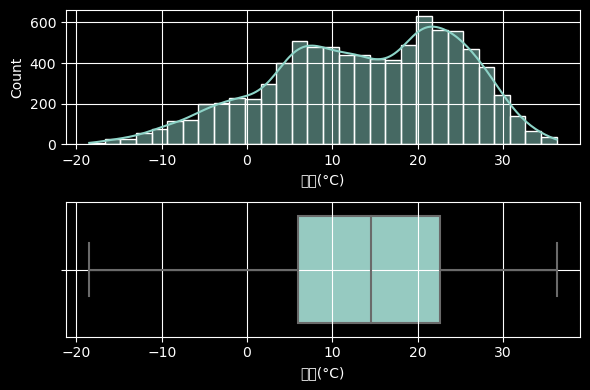

강수량(mm)


,count,mean,std,min,25%,50%,75%,max
강수량(mm),8734.0,0.283891,1.354266,0.0,0.0,0.0,0.1,64.7


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\

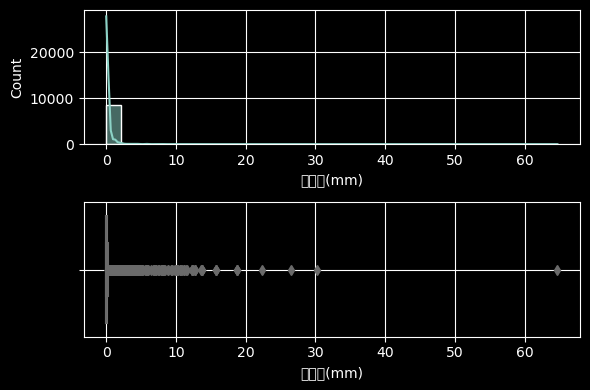

풍속(m/s)


,count,mean,std,min,25%,50%,75%,max
풍속(m/s),8734.0,2.31232,1.121968,0.0,1.5,2.2,2.9,8.3


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


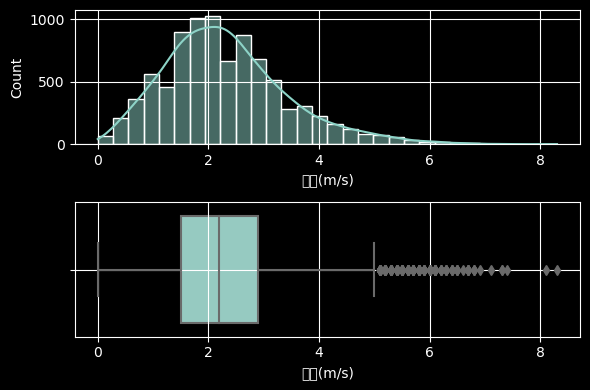

습도(%)


,count,mean,std,min,25%,50%,75%,max
습도(%),8734.0,65.560911,18.393703,19.0,51.0,66.0,80.0,100.0


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


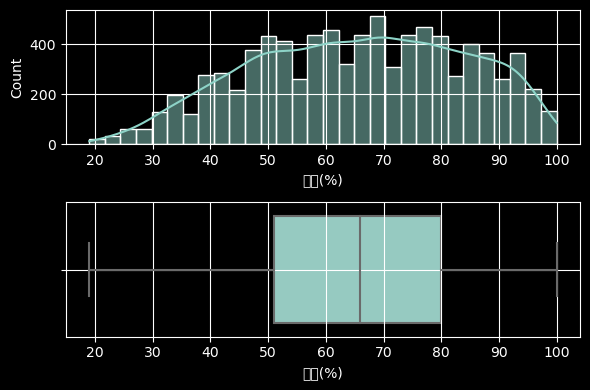

증기압(hPa)


,count,mean,std,min,25%,50%,75%,max
증기압(hPa),8734.0,12.614655,8.287967,0.7,5.9,9.7,20.0,32.2


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\p

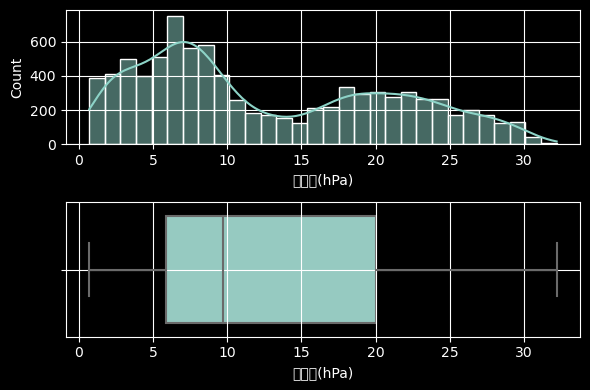

이슬점온도(°C)


,count,mean,std,min,25%,50%,75%,max
이슬점온도(°C),8734.0,6.815308,11.742908,-27.0,-0.4,6.6,17.5,25.3


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  f

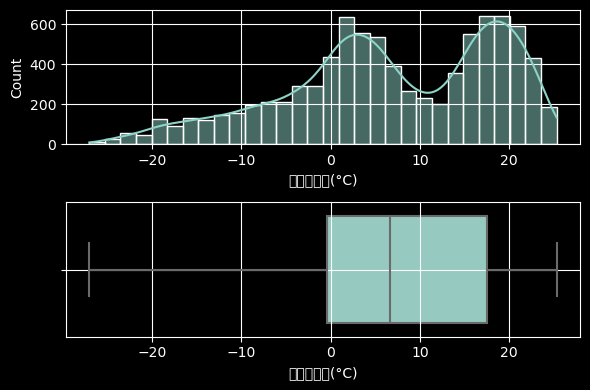

현지기압(hPa)


,count,mean,std,min,25%,50%,75%,max
현지기압(hPa),8734.0,1006.066716,7.930195,986.9,999.9,1006.3,1012.0,1025.8


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{

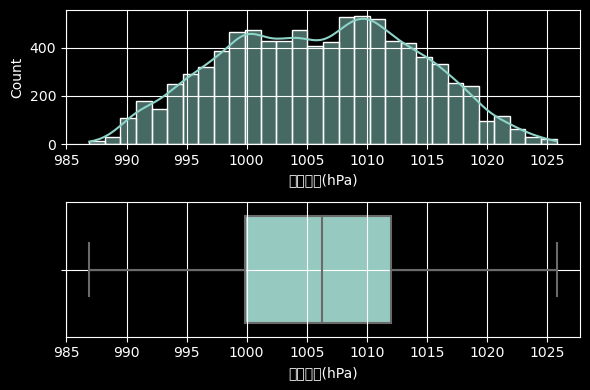

해면기압(hPa)


,count,mean,std,min,25%,50%,75%,max
해면기압(hPa),8734.0,1016.301534,8.313602,996.5,1009.8,1016.5,1022.5,1037.4


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47732 (\N{H

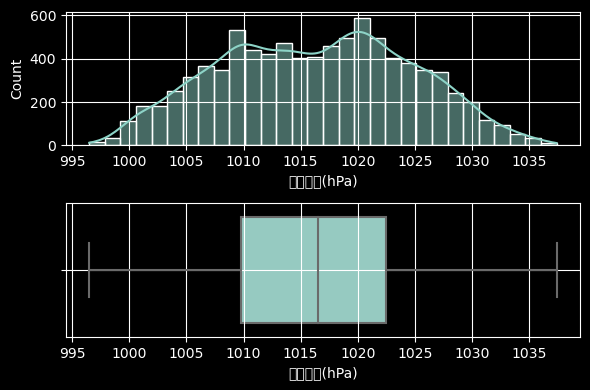

일조(hr)


,count,mean,std,min,25%,50%,75%,max
일조(hr),8734.0,0.276815,0.390121,0.0,0.0,0.0,0.5,1.0


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


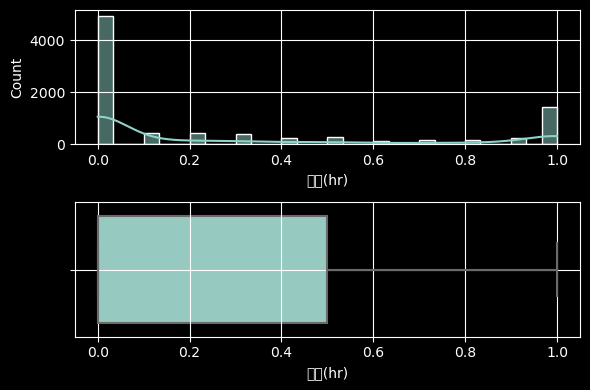

일사(MJ/m2)


,count,mean,std,min,25%,50%,75%,max
일사(MJ/m2),8734.0,0.608988,0.880403,0.0,0.02,0.11,0.93,3.74


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


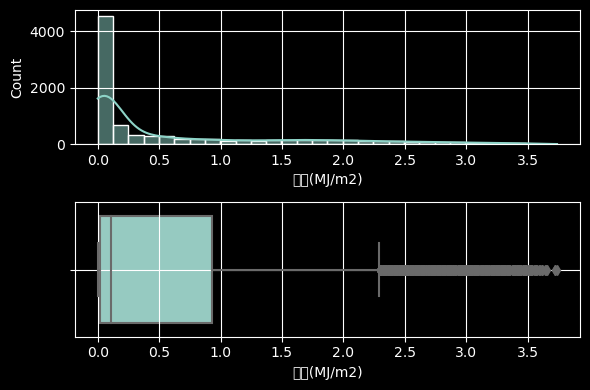

적설(cm)


,count,mean,std,min,25%,50%,75%,max
적설(cm),8734.0,0.990325,0.686911,0.0,0.2,1.4,1.4,5.1


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


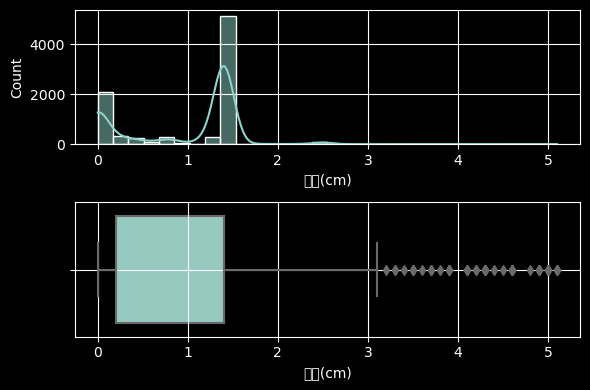

3시간신적설(cm)


,count,mean,std,min,25%,50%,75%,max
3시간신적설(cm),8734.0,0.091608,0.358409,0.0,0.0,0.0,0.0,4.4


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.

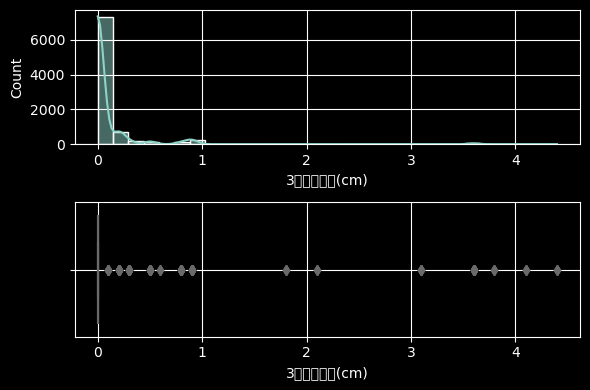

전운량(10분위)


,count,mean,std,min,25%,50%,75%,max
전운량(10분위),8734.0,4.967827,3.927547,0.0,0.0,6.0,9.0,10.0


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current fon

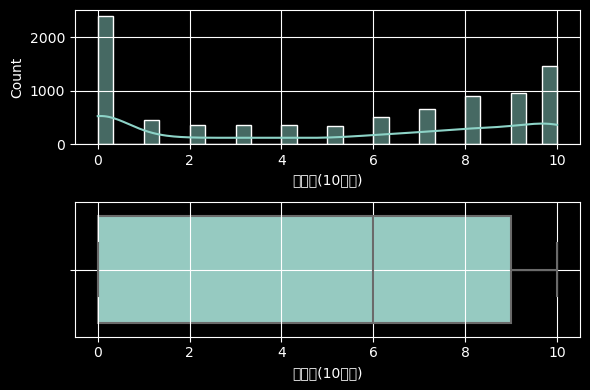

중하층운량(10분위)


,count,mean,std,min,25%,50%,75%,max
중하층운량(10분위),8734.0,3.038012,3.453663,0.0,0.0,1.0,6.0,10.0


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 52789 (\N{HANGUL SYLLABLE CEUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
C

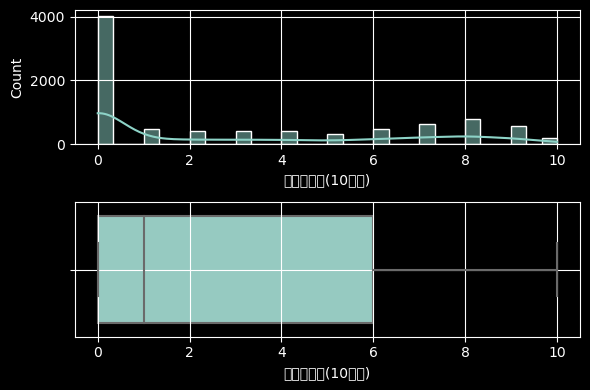

최저운고(100m )


,count,mean,std,min,25%,50%,75%,max
최저운고(100m ),8734.0,16.359973,14.262038,1.0,8.0,10.0,16.0,76.0


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51200 (\N{HAN

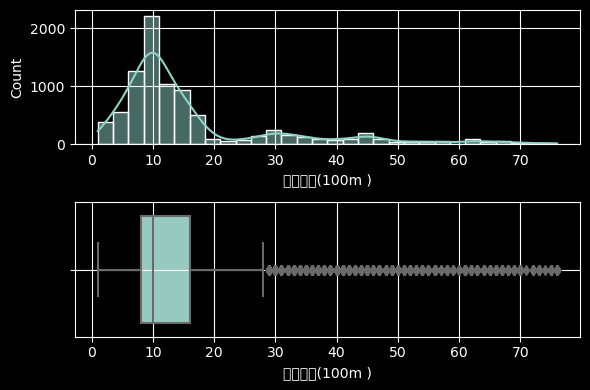

시정(10m)


,count,mean,std,min,25%,50%,75%,max
시정(10m),8734.0,1719.073964,521.692003,33.0,1715.25,2000.0,2000.0,2000.0


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


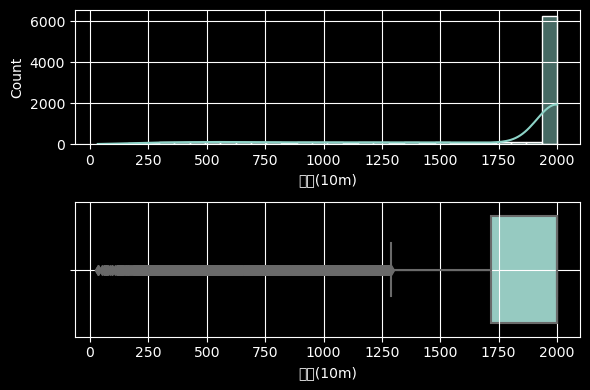

지면온도(°C)


,count,mean,std,min,25%,50%,75%,max
지면온도(°C),8734.0,14.717117,12.046266,-12.7,4.3,15.4,23.6,56.8


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47732 (\N{HAN

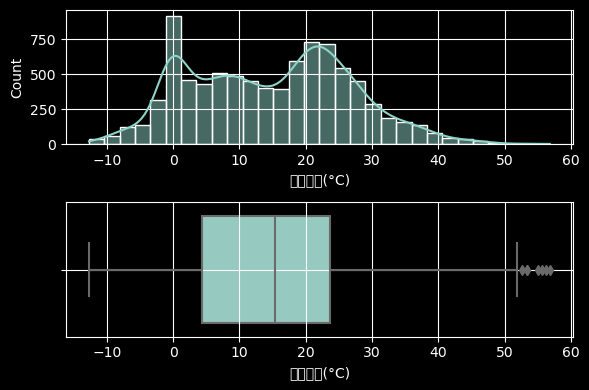

5cm 지중온도(°C)


,count,mean,std,min,25%,50%,75%,max
5cm 지중온도(°C),8734.0,15.112858,10.181862,-4.7,5.9,15.4,24.1,35.7


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANG

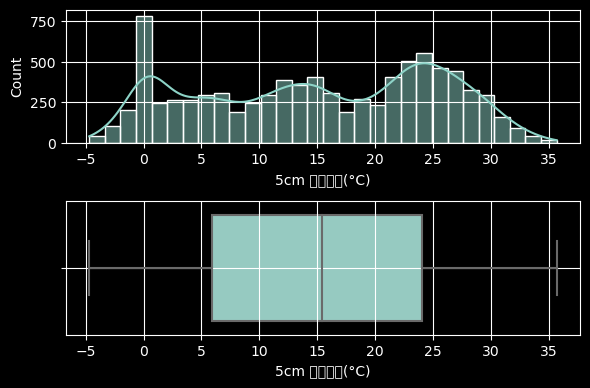

10cm 지중온도(°C)


,count,mean,std,min,25%,50%,75%,max
10cm 지중온도(°C),8734.0,14.538814,10.050125,-4.6,5.5,14.7,23.575,33.7


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANG

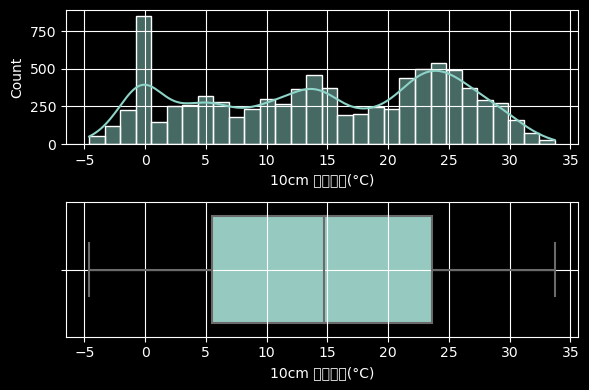

20cm 지중온도(°C)


,count,mean,std,min,25%,50%,75%,max
20cm 지중온도(°C),8734.0,14.51635,9.743981,-3.0,5.6,14.6,23.4,31.9


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANG

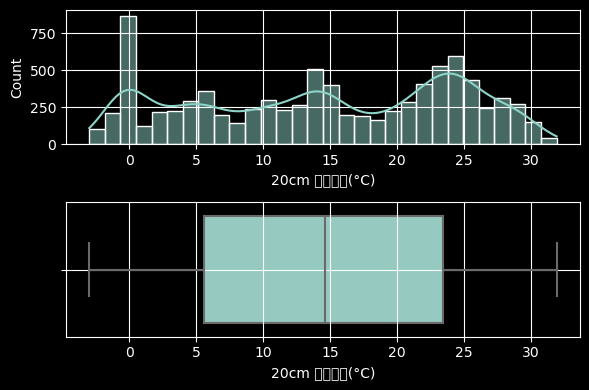

30cm 지중온도(°C)


,count,mean,std,min,25%,50%,75%,max
30cm 지중온도(°C),8734.0,14.810121,9.364025,-0.8,6.2,15.1,23.6,30.6


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10392\2329395889.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANG

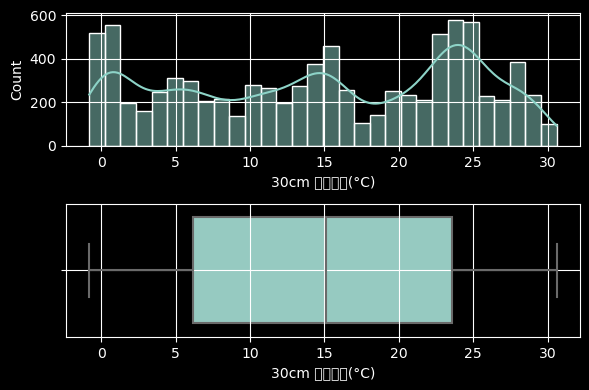

PM10_lag1


,count,mean,std,min,25%,50%,75%,max
PM10_lag1,8734.0,38.840394,47.308695,3.0,18.0,30.0,46.0,942.0


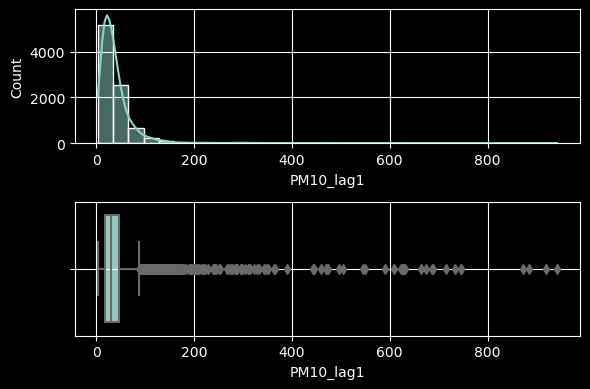

In [6]:
import seaborn as sns

def numeric_plot(var, data, bins=20):
    display(data[[var]].describe().T)
    plt.figure(figsize = (6,4))
    plt.subplot(2,1,1)
    sns.histplot(x=var, data = data, bins = bins, kde = True)
    plt.grid()
    
    plt.subplot(2,1,2)
    sns.boxplot(x = var, data = data)
    plt.grid()
    
    plt.tight_layout()
    plt.show()

for x in list(train_x):
    print(x)
    numeric_plot(x,train_x,30)
    # train_x[x].plot.line()
    # plt.show()

In [4]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
from sklearn.model_selection import GridSearchCV

model_GB = GradientBoostingRegressor()

params = {'max_depth': range(1,10)}

In [8]:
models = {
            'LR': LinearRegression(),
            'RF': RandomForestRegressor(),
            'GB': GradientBoostingRegressor(),
            'KNN': KNeighborsRegressor(),
            'DT': DecisionTreeRegressor()
         }

results = {}

for model_n in models:
    model = models[model_n]
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    
    print('='*20, model_n, '='*20)
    print('='*60)
    print('MSE', mse(test_y, y_pred))
    print('R2', r2_score(test_y,y_pred))
    
    results[model_n]=[mse(test_y, y_pred), r2_score(test_y,y_pred)]
    # if model_n in ['RF','GB','DT']:
    #     plt.barh(list(train_x), model.feature_importances_)
    #     plt.show()

==================== LR ====================
MSE 37.72268219176712
R2 0.9321776694354904


C:\Users\User\AppData\Local\Temp\ipykernel_10392\2303226985.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


==================== RF ====================
MSE 40.88225915690866
R2 0.9264970056829906


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


==================== GB ====================
MSE 37.35378836882862
R2 0.9328409106831661
==================== KNN ====================
MSE 272.83692740046837
R2 0.5094612788589509
==================== DT ====================
MSE 94.48524590163935
R2 0.8301231723546812


In [9]:
result_df = pd.DataFrame(results).transpose()
result_df.columns=['MSE','R2']
result_df

,MSE,R2
LR,37.722682,0.932178
RF,40.882259,0.926497
GB,37.353788,0.932841
KNN,272.836927,0.509461
DT,94.485246,0.830123
